### Data

The data for this project is sourced from __[The World Bank](data.worldbank.org)__.

The following csv files have been compiled:

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import squarify 
import humanize
import warnings
warnings.filterwarnings('ignore')

In [2]:
internet = pd.read_csv('internet.csv')
people = pd.read_csv('people.csv')

### Data validation

#### Internet

In [3]:
internet.head()

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          7089 non-null   object 
 1   Code            5761 non-null   object 
 2   Year            7089 non-null   int64  
 3   Internet_Usage  7089 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.7+ KB


In [5]:
nulls = internet[internet['Code'].isnull() == True]
nulls

,Entity,Code,Year,Internet_Usage
22,Africa Eastern and Southern,NaN,1990,0.000000
23,Africa Eastern and Southern,NaN,1991,0.001599
24,Africa Eastern and Southern,NaN,1992,0.004664
25,Africa Eastern and Southern,NaN,1993,0.013609
26,Africa Eastern and Southern,NaN,1994,0.029658
...,...,...,...,...
6827,Upper middle income,NaN,2013,46.783103
6828,Upper middle income,NaN,2014,49.389453
6829,Upper middle income,NaN,2015,53.161580
6830,Upper middle income,NaN,2016,55.786069


In [6]:
print(nulls[['Entity']].value_counts())

Entity                                            
Euro area                                             30
Central Europe and the Baltics                        30
European Union                                        30
Europe & Central Asia (excluding high income)         30
Europe & Central Asia (IDA & IBRD)                    30
Europe & Central Asia                                 30
OECD members                                          29
High income                                           29
Post-demographic dividend                             29
Latin America & Caribbean                             29
Middle East & North Africa (excluding high income)    29
Middle East & North Africa (IDA & IBRD)               29
Latin America & Caribbean (IDA & IBRD)                29
Latin America & Caribbean (excluding high income)     29
Middle East & North Africa                            29
Arab World                                            29
North America                        

The table has null values in the "Code" column. These nulls are codes for regions and different entities other than countries.

In [7]:
internet.describe()

,Year,Internet_Usage
count,7089.000000,7089.000000
mean,2003.858936,20.969479
std,8.339364,27.488015
min,1990.000000,0.000000
25%,1997.000000,0.158150
50%,2004.000000,6.000000
75%,2011.000000,36.000000
max,2019.000000,99.701504


#### People

In [8]:
people.head()

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


In [9]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6379 non-null   object
 1   Code    6072 non-null   object
 2   Year    6379 non-null   int64 
 3   Users   6379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 199.5+ KB


In [10]:
nulls = people[people['Code'].isnull() == True]
nulls

,Entity,Code,Year,Users
26,Africa,NaN,1990,0
27,Africa,NaN,1991,5434
28,Africa,NaN,1992,16232
29,Africa,NaN,1993,48970
30,Africa,NaN,1994,112387
...,...,...,...,...
6104,Upper-middle-income countries,NaN,2016,1387883616
6105,Upper-middle-income countries,NaN,2017,1463645733
6106,Upper-middle-income countries,NaN,2018,1577537079
6107,Upper-middle-income countries,NaN,2019,1689000449


### Data Analysis

#### 1. What are the top 10 countries with the highest internet use (by population share)?

Subsetting *internet* dataset as *countries* where column 'Entity' will only include countries.

In [11]:
internet['Entity'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Caribbean Small States', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demograph

In [12]:
other_entities = [
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Arab World',
    'Caribbean Small States',
    'Central Europe and the Baltics',
    'Early-demographic dividend',
    'East Asia & Pacific',
    'East Asia & Pacific (IDA & IBRD)',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'IBRD only',
    'IDA & IBRD total', 
    'IDA blend', 
    'IDA only', 
    'IDA total',
    'Late-demographic dividend', 
    'Latin America & Caribbean',
    'Latin America & Caribbean (IDA & IBRD)',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income', 
    'Low income', 
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD)',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'North America',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Post-demographic dividend',
    'Pre-demographic dividend',
    'Small states',
    'South Africa',
    'South Asia', 
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa',
    'Sub-Saharan Africa (IDA & IBRD)',
    'Sub-Saharan Africa (excluding high income)',
    'Turks and Caicos Islands',
    'Upper middle income',
    'World'
]

In [13]:
countries = internet.drop(internet[internet.Entity.isin(other_entities)].index)

In [14]:
countries

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [15]:
countries['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French P

##### Top 10 countries with the highest Internet use (by population share) for the period 2007 - 2017:

I want to focus my analysis on the past 10 years. That would be 2009 - 2019. However, in the *internet* dataset, not every country has data for the years 2018 and 2019 (e.g. Canada, United States). Therefore, the most recent data that will be the most accurate would be for the years 2007 - 2017.

In [16]:
top10_countries_2007_2017 = countries[countries['Year'].isin(range(2007, 2017))]
top10_countries_2007_2017 = top10_countries_2007_2017.groupby('Entity')['Internet_Usage'].agg([np.median, np.mean]).sort_values(by="median", ascending=False).head(10)
top10_countries_2007_2017 = top10_countries_2007_2017.reset_index()

top10_countries_2007_2017

,Entity,median,mean
0,Iceland,95.514743,95.016630
1,Norway,94.069980,93.657189
2,Luxembourg,91.284962,90.401970
3,Netherlands,91.069998,90.562815
4,Denmark,91.035013,91.159801
5,Sweden,90.805098,90.652472
6,Bermuda,89.817652,89.216951
7,Liechtenstein,87.203850,84.823302
8,Finland,86.710196,86.459057
9,United Kingdom,86.429998,86.313020


The top 10 countries with the highest Internet use (by population share) for the years 2007 to 2017 are: <br>
<br>
**1. Iceland** <br>
**2. Norway** <br>
**3. Luxembourg** <br>
**4. Netherlands** <br>
**5. Denmark** <br>
**6. Sweden** <br>
**7. Bermuda** <br>
**8. Liechtenstein** <br>
**9. Finland** <br>
**10. United Kingdom**

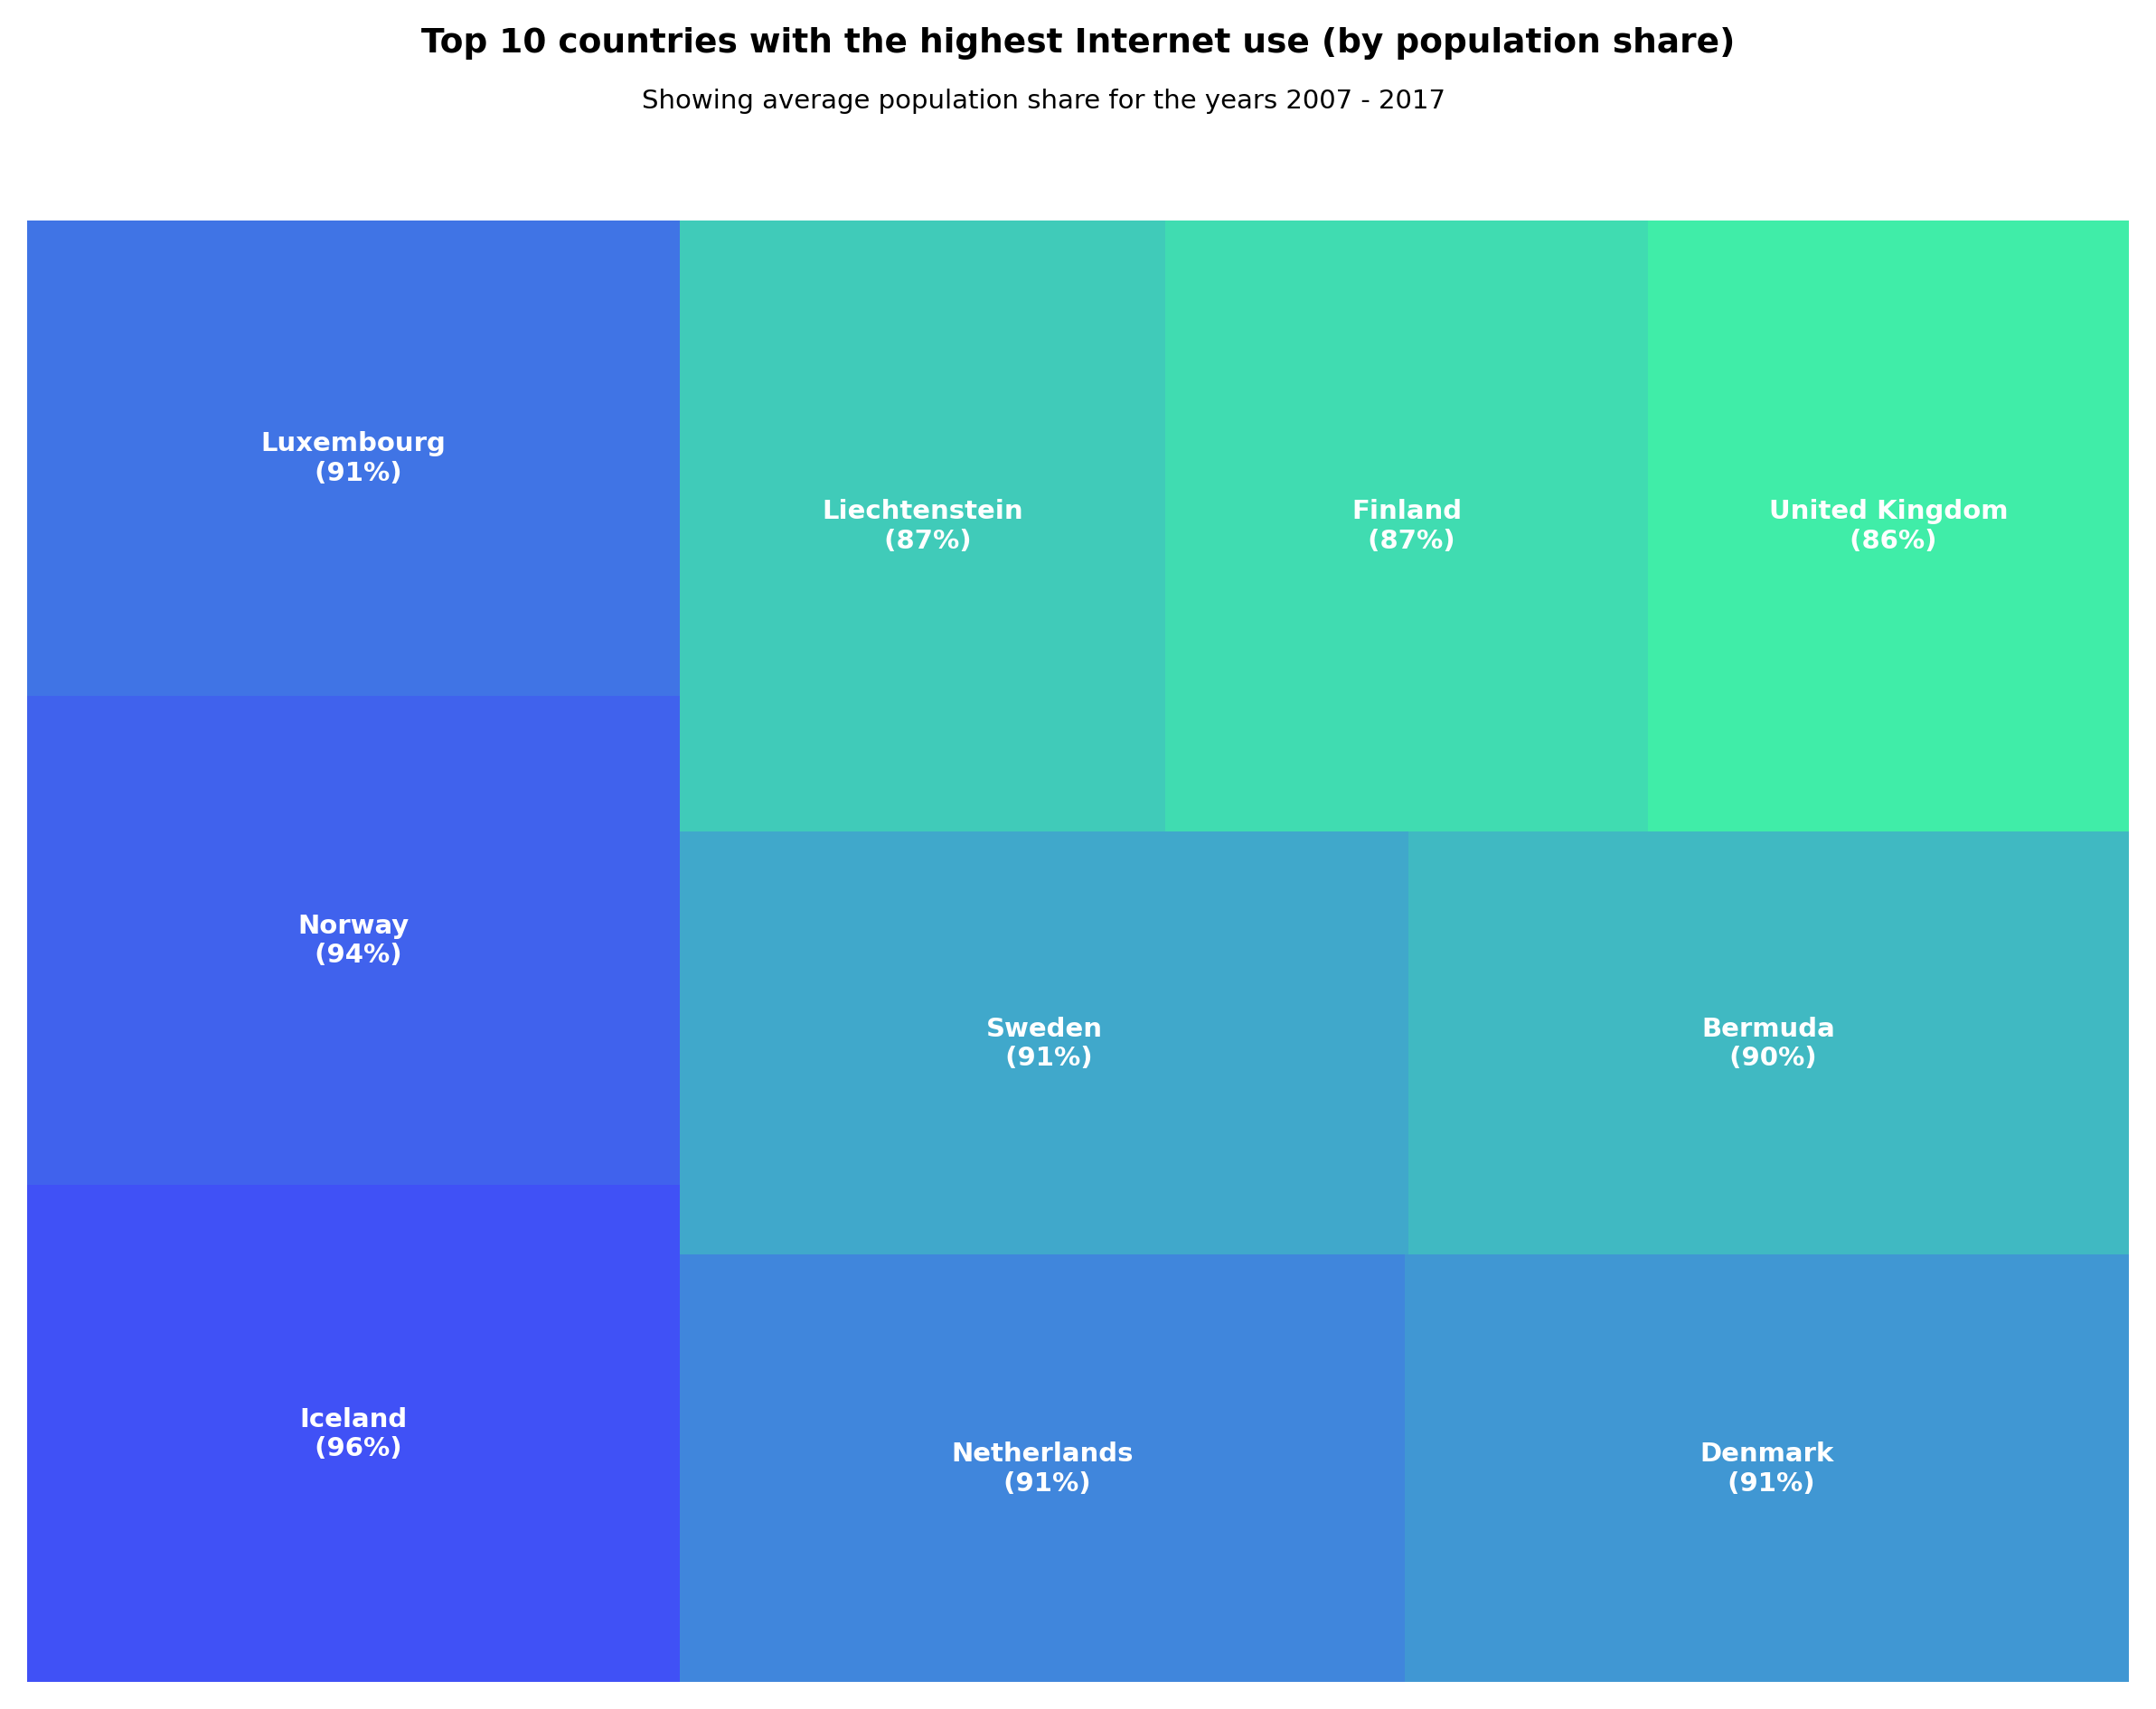

In [17]:
sizes = top10_countries_2007_2017['median'].values.tolist()

labels = top10_countries_2007_2017.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1])) + "%" + ")", axis=1)


fig, ax = plt.subplots(dpi=300, figsize=(10, 7))

squarify.plot(sizes=sizes, color=sns.color_palette("winter", len(sizes)), label=labels, alpha=.75, text_kwargs={'fontsize':7, 'color':'white', 'weight':'bold'})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

plt.title('Top 10 countries with the highest Internet use (by population share)', fontsize=9, weight='bold', x=0.5, y=1.1)
plt.suptitle('Showing average population share for the years 2007 - 2017', fontsize=7, x=0.5, y=0.95)

plt.show()

##### Top 5 countries with the highest Internet use (by population share) in 2017:

In [18]:
top10_countries_2017 = countries[countries['Year'] == 2017]
top10_countries_2017 = top10_countries_2017.groupby('Entity')['Internet_Usage'].agg([np.median, np.mean]).sort_values(by="median", ascending=False).head(10)
top10_countries_2017 = top10_countries_2017.reset_index()

top10_countries_2017

,Entity,median,mean
0,Liechtenstein,99.546612,99.546612
1,Bermuda,98.370000,98.370000
2,Iceland,98.255201,98.255201
3,Kuwait,97.999989,97.999989
4,Faeroe Islands,97.581959,97.581959
5,Qatar,97.388849,97.388849
6,Luxembourg,97.362960,97.362960
7,Aruba,97.170000,97.170000
8,Denmark,97.099362,97.099362
9,Monaco,97.052977,97.052977


The top 10 countries with the highest Internet use (by population share) in 2017 are: <br>
<br>
**1. Liechtenstein** <br>
**2. Bermuda** <br>
**3. Iceland** <br>
**4. Kuwait** <br>
**5. Faeroe Islands** <br>
**6. Qatar** <br>
**7. Luxembourg** <br>
**8. Aruba** <br>
**9. Denmark** <br>
**10. Monaco**

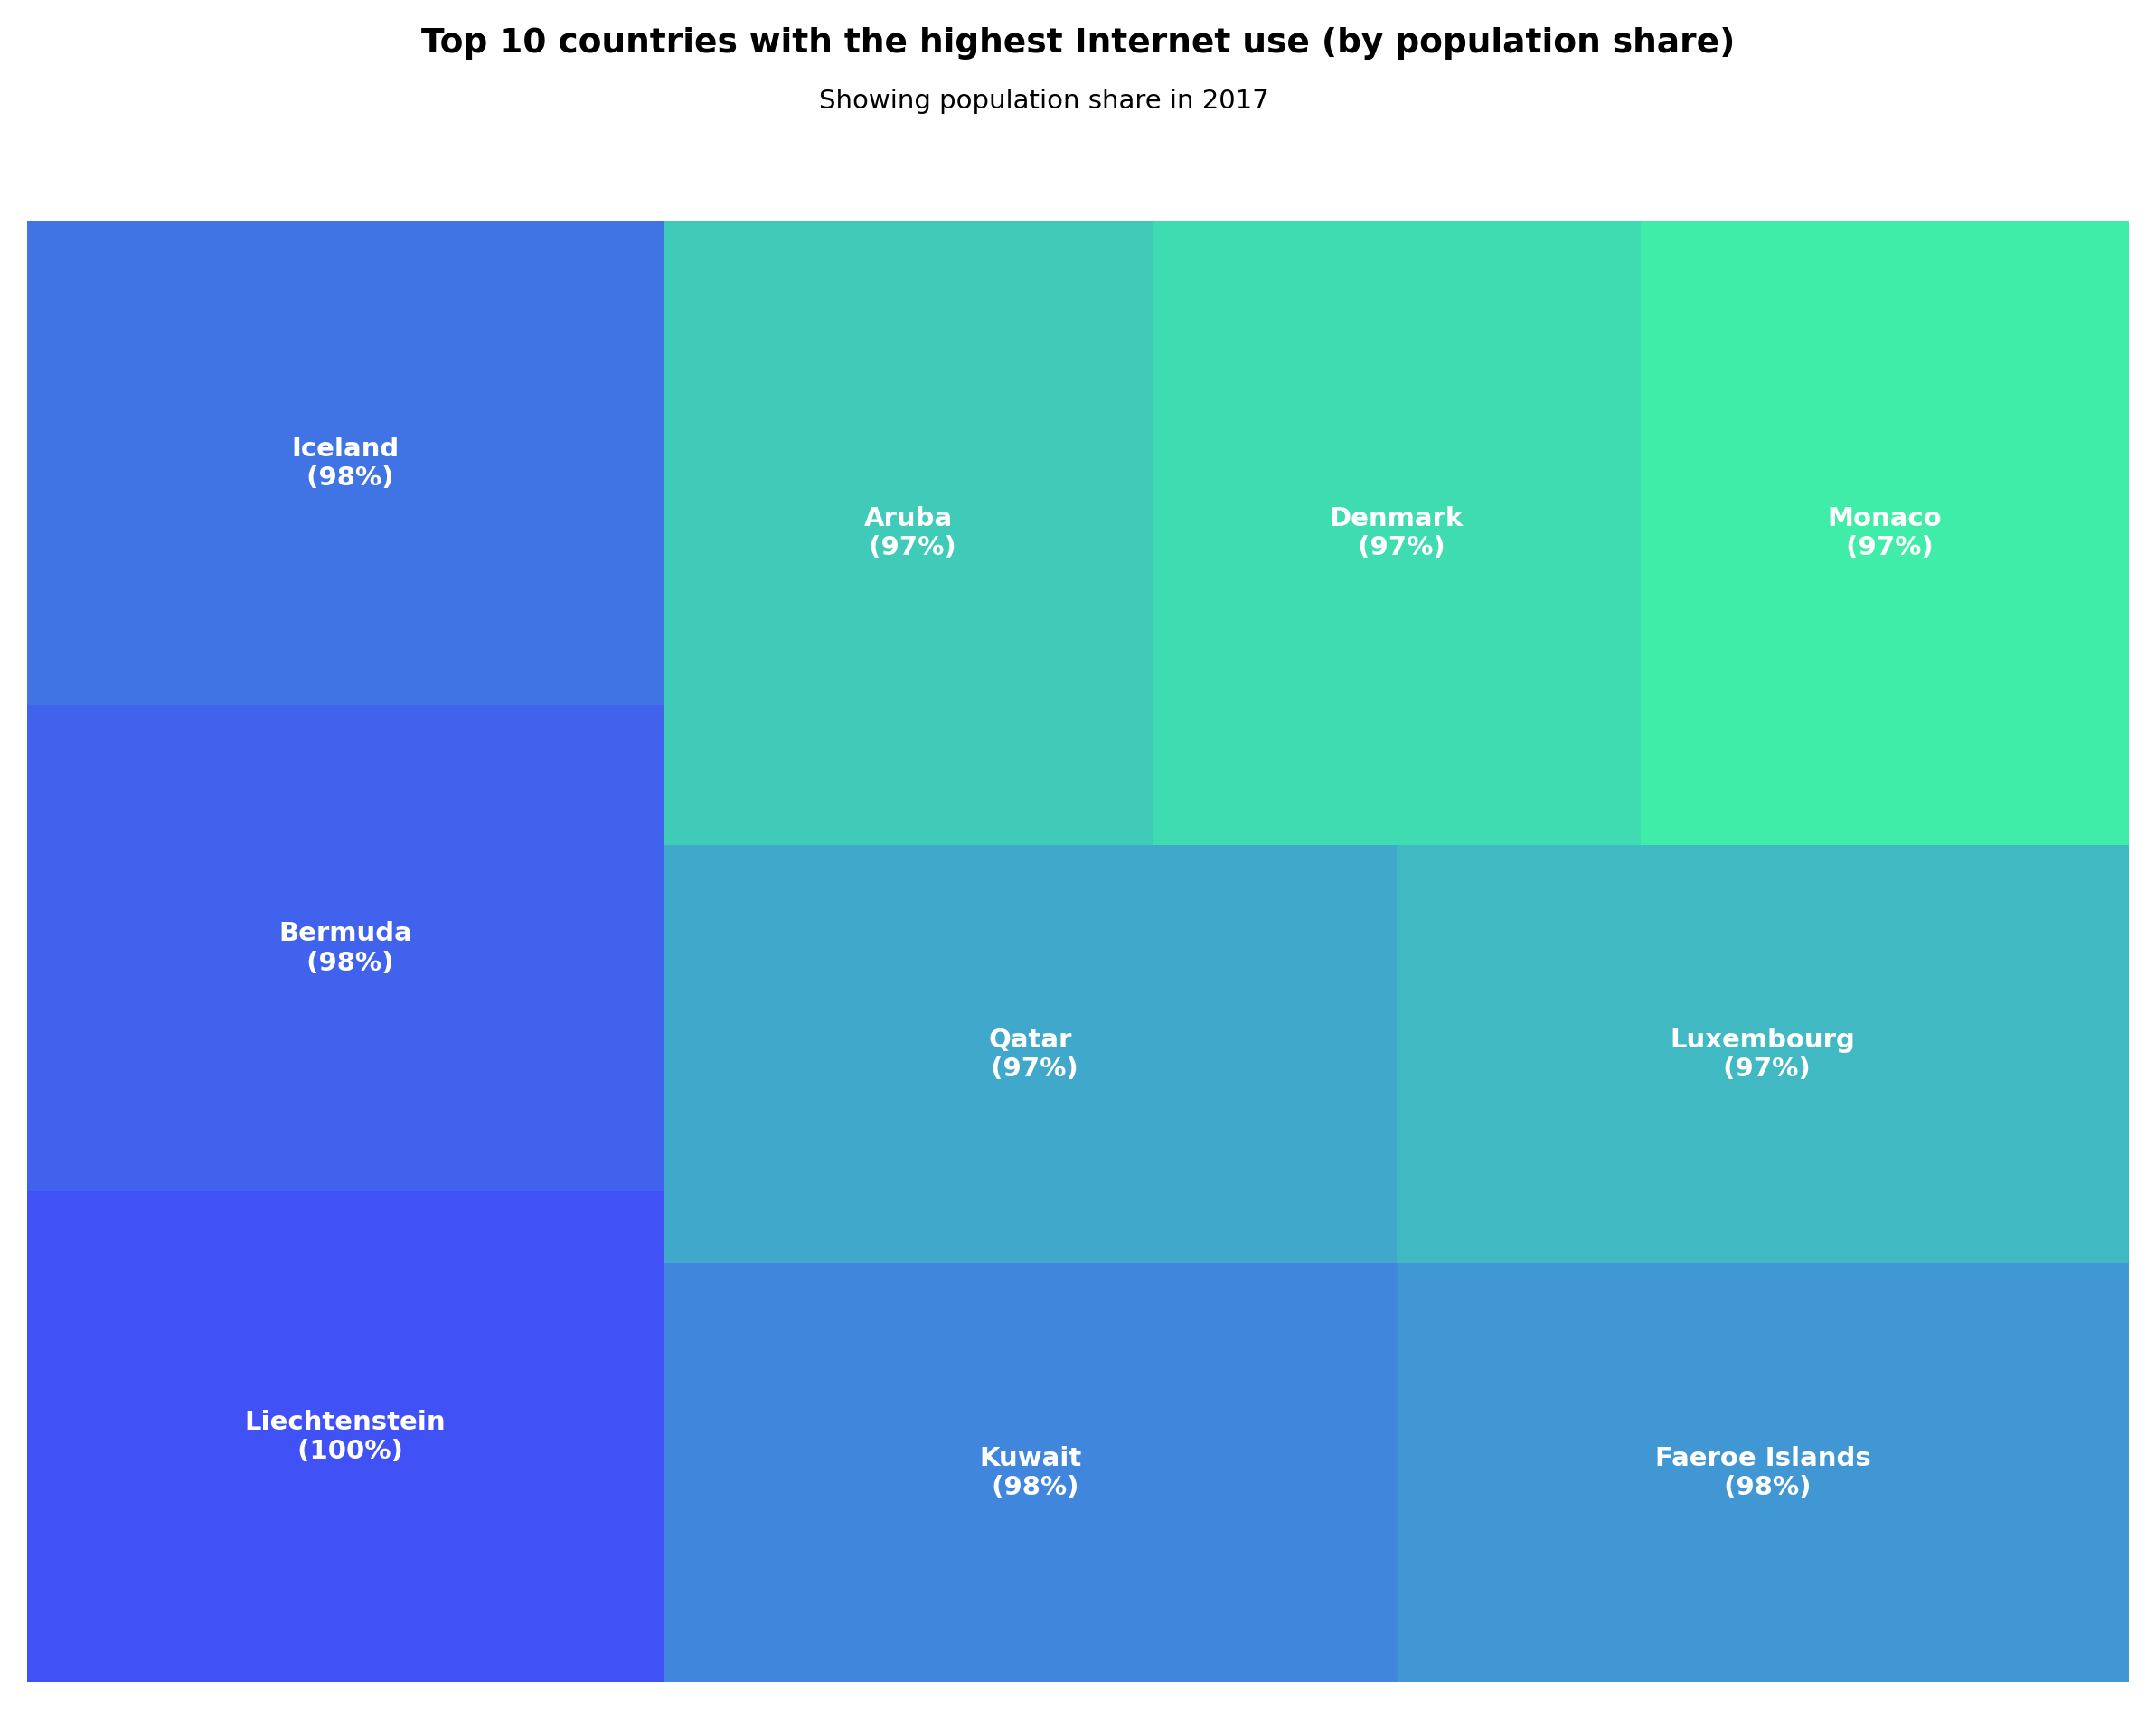

In [19]:
sizes = top10_countries_2017['median'].values.tolist()

labels = top10_countries_2017.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1])) + "%" + ")", axis=1)


fig, ax = plt.subplots(dpi=300, figsize=(10, 7))

squarify.plot(sizes=sizes, color=sns.color_palette("winter", len(sizes)), label=labels, alpha=.75, text_kwargs={'fontsize':7, 'color':'white', 'weight':'bold'})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

plt.title('Top 10 countries with the highest Internet use (by population share)', fontsize=9, weight='bold', x=0.5, y=1.1)
plt.suptitle('Showing population share in 2017', fontsize=7, x=0.5, y=0.95)

plt.show()

#### 2. What are the top 10 countries with the highest internet use (by number of users)?

In [20]:
people_2020 = people[people['Year'] == 2020]
people_2020 = people_2020.reset_index(drop=True)
people_2020

,Entity,Code,Year,Users
0,Afghanistan,AFG,2020,7170891
1,Africa,NaN,2020,451617356
2,Albania,ALB,2020,2071012
3,Algeria,DZA,2020,27331100
4,Angola,AGO,2020,12034256
...,...,...,...,...
156,Uzbekistan,UZB,2020,23837456
157,Vietnam,VNM,2020,67944025
158,World,OWID_WRL,2020,4699887523
159,Zambia,ZMB,2020,3747688


In [21]:
people_2020.dropna(inplace=True)
people_2020.drop(people_2020[people_2020['Entity'] == 'World'].index, inplace=True)
people_2020

,Entity,Code,Year,Users
0,Afghanistan,AFG,2020,7170891
2,Albania,ALB,2020,2071012
3,Algeria,DZA,2020,27331100
4,Angola,AGO,2020,12034256
5,Argentina,ARG,2020,38505807
...,...,...,...,...
155,Uruguay,URY,2020,2952444
156,Uzbekistan,UZB,2020,23837456
157,Vietnam,VNM,2020,67944025
159,Zambia,ZMB,2020,3747688


In [22]:
tm = people_2020.sort_values('Users', ascending=False).head(10)
tm

,Entity,Code,Year,Users
32,China,CHN,2020,1003218650
67,India,IND,2020,600446441
153,United States,USA,2020,305371298
21,Brazil,BRA,2020,173419624
68,Indonesia,IDN,2020,146059763
120,Russia,RUS,2020,123766963
73,Japan,JPN,2020,112995146
94,Mexico,MEX,2020,90678697
44,Egypt,EGY,2020,77282687
54,Germany,DEU,2020,74840220


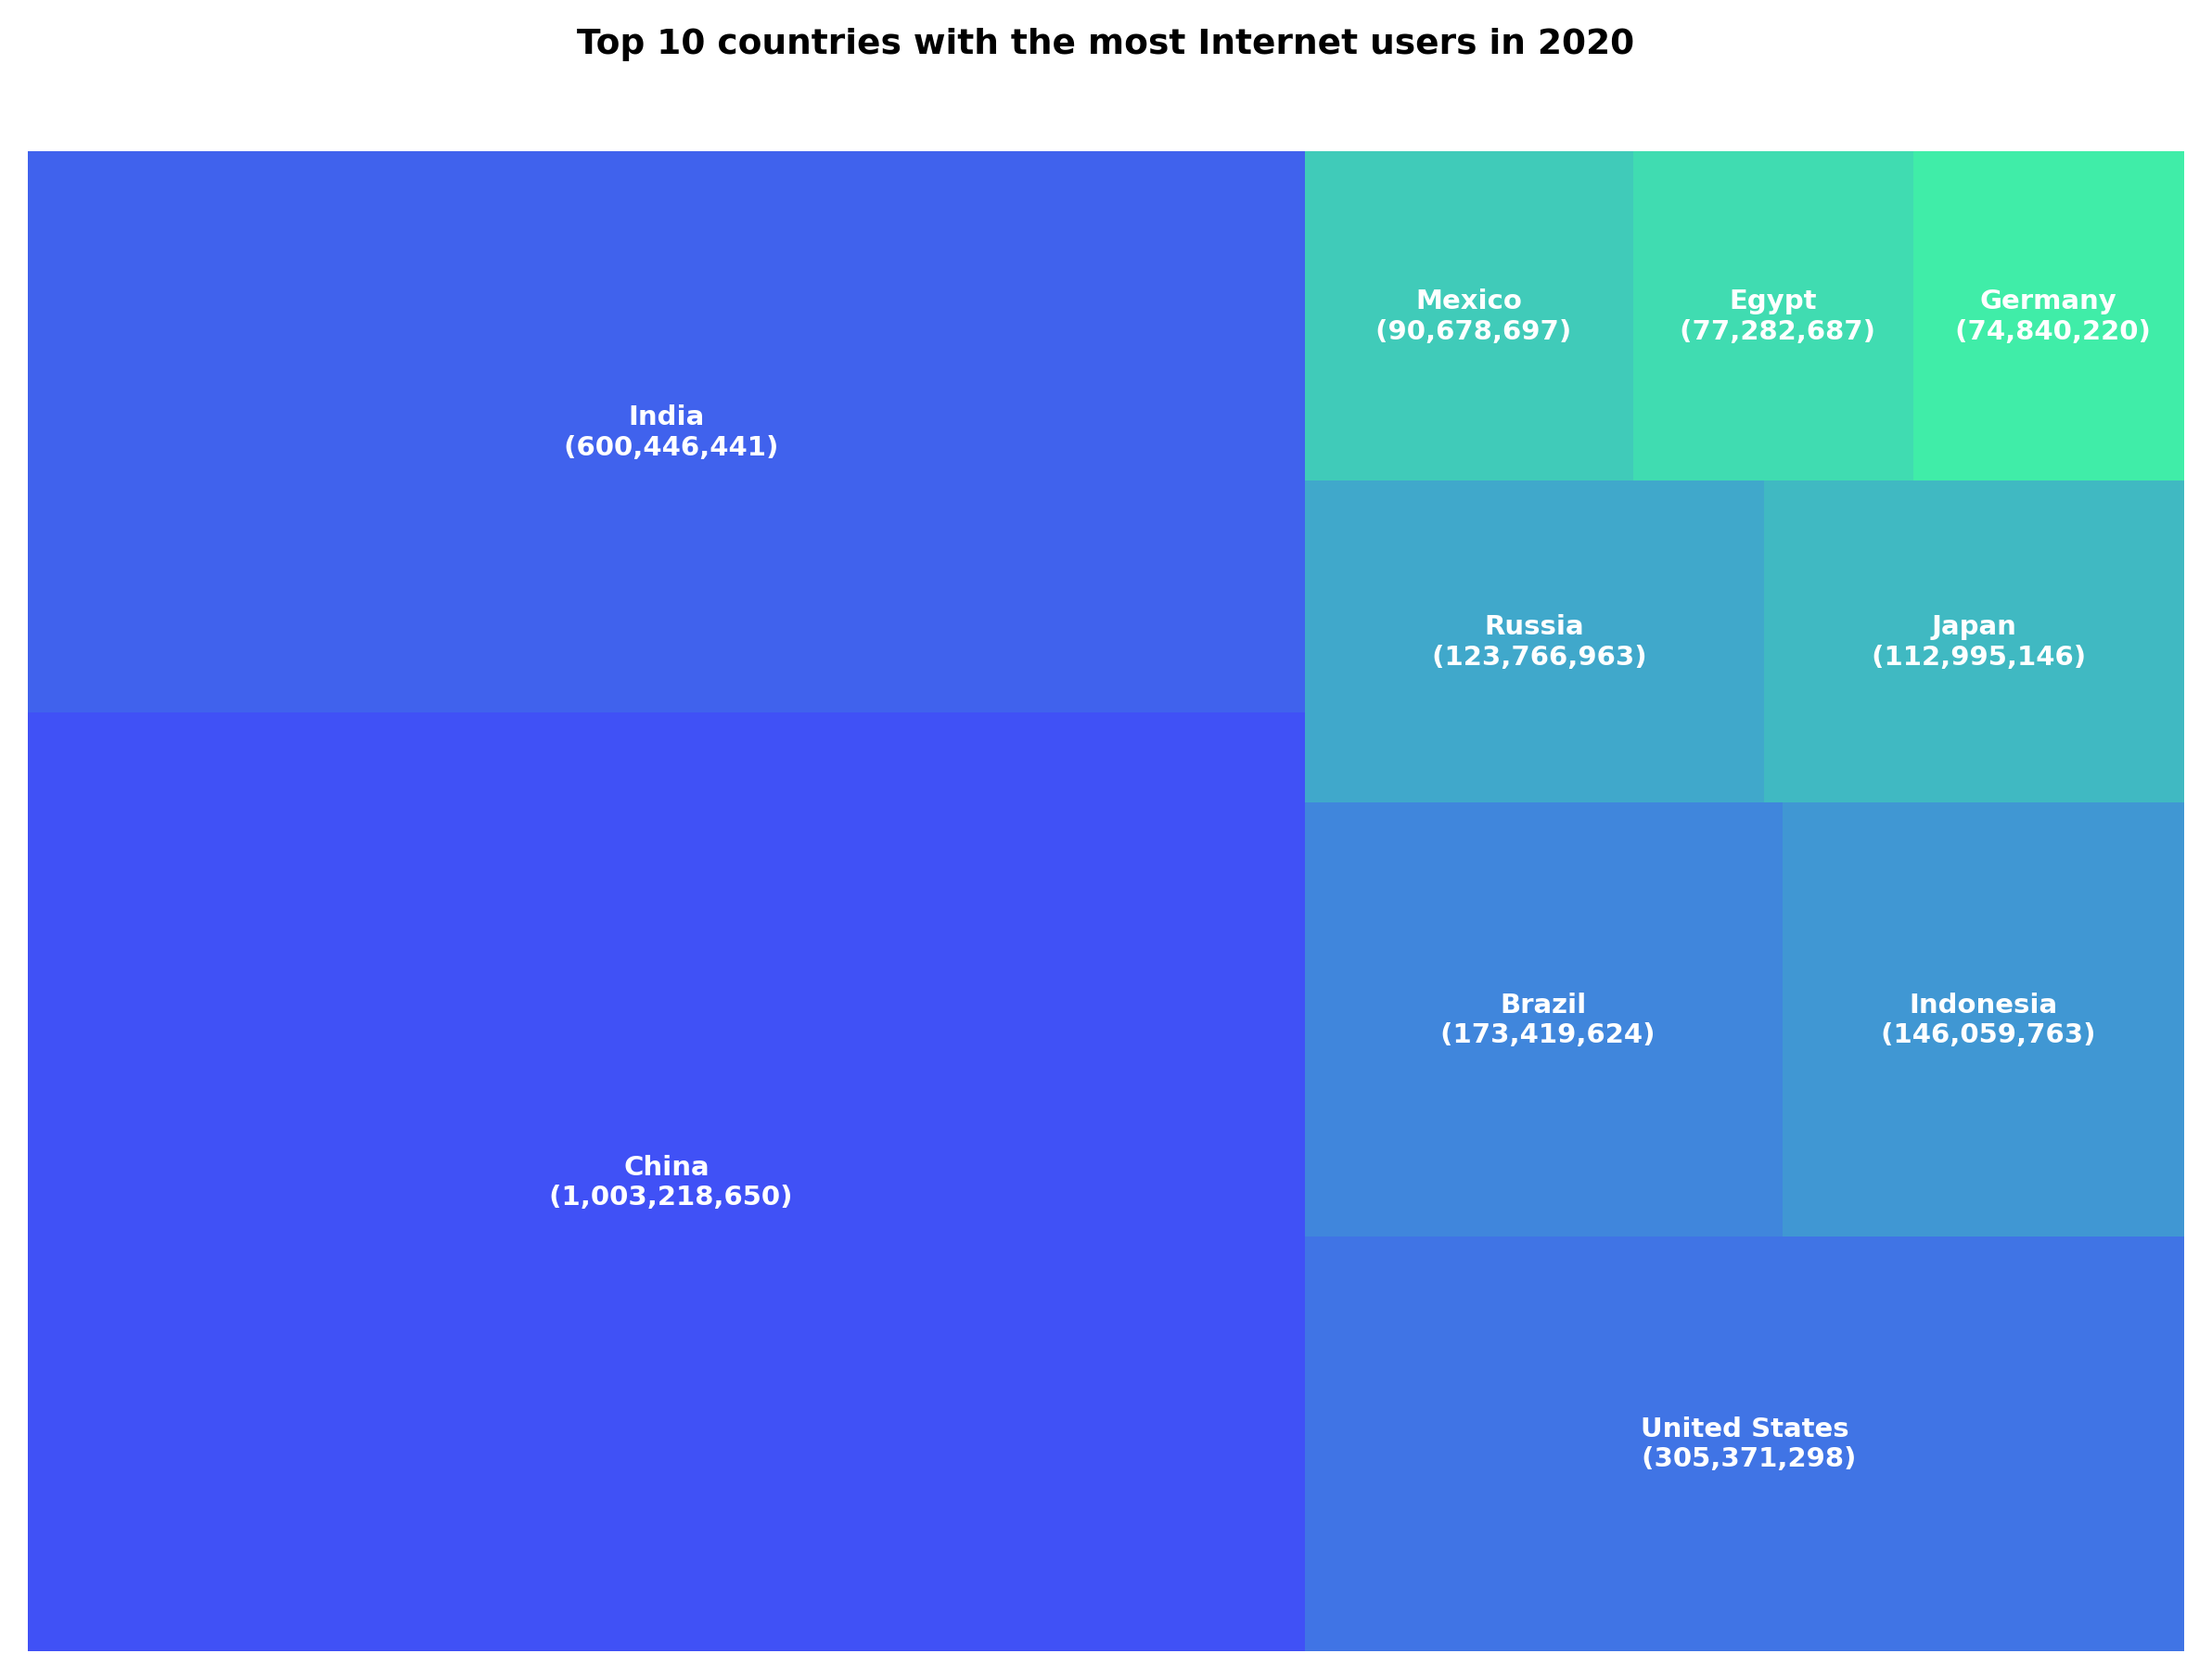

In [23]:
sizes = tm['Users'].values.tolist()

labels = tm.apply(lambda x: str(x[0]) + "\n (" + str(f'{x[3]:,}') + ")", axis=1)


fig, ax = plt.subplots(dpi=300, figsize=(10, 7))

squarify.plot(sizes=sizes, color=sns.color_palette("winter", len(sizes)), label=labels, alpha=.75, text_kwargs={'fontsize':7, 'color':'white', 'weight':'bold'})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

plt.title('Top 10 countries with the most Internet users in 2020', fontsize=9, weight='bold', x=0.5, y=1.05)

plt.show()

#### 3. What are the top countries with the highest internet use for each of the following regions?
- 'Middle East & North Africa' 
- 'Latin America & Caribbean' 
- 'East Asia & Pacific' 
- 'South Asia' 
- 'North America' 
- 'Europe & Central Asia'

In [24]:
countries.head()

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [25]:
#  There is no direct classification for each country and its region in the datasets. 
#  I am going to resolve this issue with WorldBank classifiction. 
#  Original "CLASS.xlsx" file could be downloaded at http://databank.worldbank.org/data/download/site-content/CLASS.xlsx

classification = pd.read_excel('CLASS.xlsx')

In [26]:
classification.head()

,Economy,Code,Region,Income group,Lending category,Other (EMU or HIPC)
0,Aruba,ABW,Latin America & Caribbean,High income,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,NaN
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN,NaN


In [27]:
classification.drop(['Income group', 'Lending category', 'Other (EMU or HIPC)'], axis=1, inplace=True)

classification.head()

,Economy,Code,Region
0,Aruba,ABW,Latin America & Caribbean
1,Afghanistan,AFG,South Asia
2,Angola,AGO,Sub-Saharan Africa
3,Albania,ALB,Europe & Central Asia
4,Andorra,AND,Europe & Central Asia


In [28]:
countries = pd.merge(
    countries,
    classification,
    how='left',
    on='Code'
)

In [29]:
countries.head()

,Entity,Code,Year,Internet_Usage,Economy,Region
0,Afghanistan,AFG,1990,0.0,Afghanistan,South Asia
1,Afghanistan,AFG,1991,0.0,Afghanistan,South Asia
2,Afghanistan,AFG,1992,0.0,Afghanistan,South Asia
3,Afghanistan,AFG,1993,0.0,Afghanistan,South Asia
4,Afghanistan,AFG,1994,0.0,Afghanistan,South Asia


In [30]:
countries['Region'].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America',
       nan], dtype=object)

In [31]:
countries.drop(countries[countries.Region == 'Sub-Saharan Africa'].index, inplace=True)

In [32]:
countries[countries['Region'].isna()]

,Entity,Code,Year,Internet_Usage,Economy,Region
2763,Kosovo,OWID_KOS,2017,83.893597,NaN,NaN
2764,Kosovo,OWID_KOS,2018,89.443032,NaN,NaN


In [33]:
countries.dropna(inplace=True)

In [34]:
countries[countries['Region'].isna()]

,Entity,Code,Year,Internet_Usage,Economy,Region


In [35]:
countries.head()

,Entity,Code,Year,Internet_Usage,Economy,Region
0,Afghanistan,AFG,1990,0.0,Afghanistan,South Asia
1,Afghanistan,AFG,1991,0.0,Afghanistan,South Asia
2,Afghanistan,AFG,1992,0.0,Afghanistan,South Asia
3,Afghanistan,AFG,1993,0.0,Afghanistan,South Asia
4,Afghanistan,AFG,1994,0.0,Afghanistan,South Asia


In [36]:
countries_2007_2017 = countries[countries['Year'].isin(range(2007, 2018))]

In [37]:
countries_2007_2017

,Entity,Code,Year,Internet_Usage,Economy,Region
12,Afghanistan,AFG,2007,1.900000,Afghanistan,South Asia
13,Afghanistan,AFG,2008,1.840000,Afghanistan,South Asia
14,Afghanistan,AFG,2009,3.550000,Afghanistan,South Asia
15,Afghanistan,AFG,2010,4.000000,Afghanistan,South Asia
16,Afghanistan,AFG,2011,5.000000,Afghanistan,South Asia
...,...,...,...,...,...,...
5638,Yemen,YEM,2013,20.000000,"Yemen, Rep.",Middle East & North Africa
5639,Yemen,YEM,2014,22.550000,"Yemen, Rep.",Middle East & North Africa
5640,Yemen,YEM,2015,24.085409,"Yemen, Rep.",Middle East & North Africa
5641,Yemen,YEM,2016,24.579208,"Yemen, Rep.",Middle East & North Africa


In [38]:
countries_2007_2017 = countries_2007_2017.groupby(['Region', 'Entity'])['Internet_Usage'].median()

countries_2007_2017

Region               Entity   
East Asia & Pacific  Australia    79.487698
                     Brunei       60.273065
                     Cambodia      4.940000
                     China        42.300117
                     Fiji         33.742357
                                    ...    
South Asia           India        12.580061
                     Maldives     38.930100
                     Nepal        11.149300
                     Pakistan      9.960000
                     Sri Lanka    15.000000
Name: Internet_Usage, Length: 160, dtype: float64

In [39]:
countries_2007_2017 = countries_2007_2017.groupby('Region').apply(lambda x: x.nlargest(5, keep='all')).reset_index(level=0, drop=True)

countries_2007_2017


Region                      Entity              
East Asia & Pacific         South Korea             84.070000
                            New Zealand             81.644470
                            Japan                   79.496400
                            Australia               79.487698
                            Hong Kong               72.900000
Europe & Central Asia       Iceland                 96.209800
                            Norway                  94.649978
                            Denmark                 92.260012
                            Luxembourg              91.949924
                            Netherlands             91.419996
Latin America & Caribbean   Aruba                   74.000000
                            Bahamas                 71.748203
                            Barbados                71.200000
                            Cayman Islands          69.700000
                            Curacao                 64.991363
Middle East & North A

In [40]:
countries_2007_2017 = pd.DataFrame(countries_2007_2017).reset_index()

countries_2007_2017

,Region,Entity,Internet_Usage
0,East Asia & Pacific,South Korea,84.070000
1,East Asia & Pacific,New Zealand,81.644470
2,East Asia & Pacific,Japan,79.496400
3,East Asia & Pacific,Australia,79.487698
4,East Asia & Pacific,Hong Kong,72.900000
5,Europe & Central Asia,Iceland,96.209800
6,Europe & Central Asia,Norway,94.649978
7,Europe & Central Asia,Denmark,92.260012
8,Europe & Central Asia,Luxembourg,91.949924
9,Europe & Central Asia,Netherlands,91.419996


In [41]:
east_asia = countries_2007_2017[countries_2007_2017['Region'] == 'East Asia & Pacific']
europe = countries_2007_2017[countries_2007_2017['Region'] == 'Europe & Central Asia']
latin_america = countries_2007_2017[countries_2007_2017['Region'] == 'Latin America & Caribbean']
middle_east = countries_2007_2017[countries_2007_2017['Region'] == 'Middle East & North Africa']
north_america = countries_2007_2017[countries_2007_2017['Region'] == 'North America']
south_asia = countries_2007_2017[countries_2007_2017['Region'] == 'South Asia']

In [42]:
latin_america = latin_america.replace(['United States Virgin Islands'], 'US Virgin Islands')

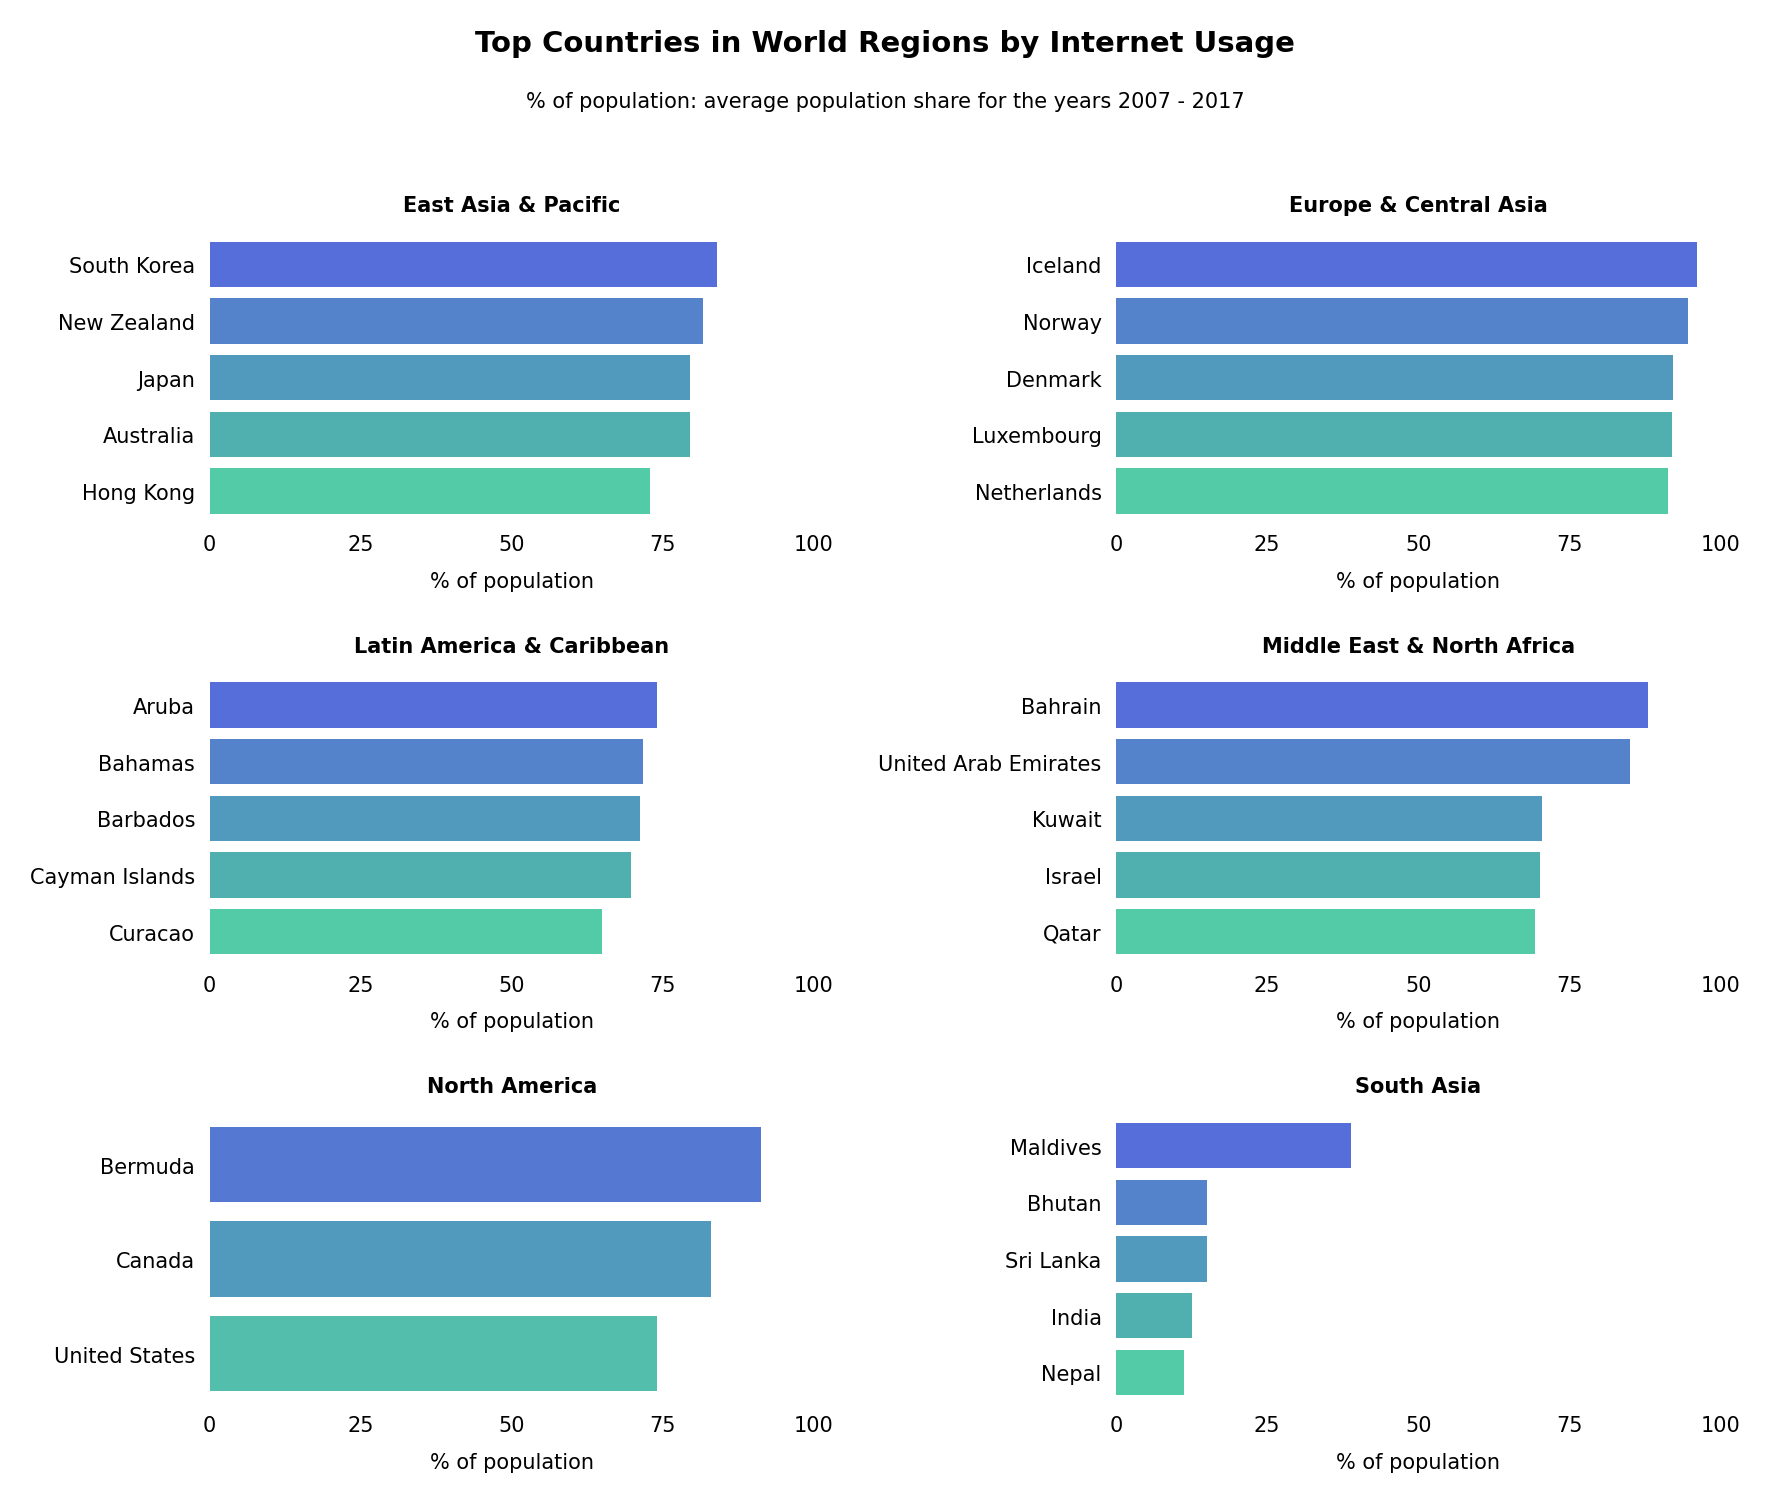

In [43]:
fig, ax = plt.subplots(3,2, dpi=300, figsize=(6,8))

fig.suptitle('Top Countries in World Regions by Internet Usage', fontsize=7, weight='bold', x=.5, y=1.02)
#plt.text(.2, 0.95, '% of population: median population share for the years 1990 - 2019', transform=fig.transFigure, fontsize=6)
fig.text(s='% of population: average population share for the years 2007 - 2017', x=0.5, y=0.99, fontsize=5, ha='center', va='center')

ax = ax.flatten()

sns.barplot(data=east_asia, y='Entity', x='Internet_Usage', ax=ax[0], palette='winter', alpha=0.75)
sns.barplot(data=europe, y='Entity', x='Internet_Usage', ax=ax[1], palette='winter', alpha=0.75)
sns.barplot(data=latin_america, y='Entity', x='Internet_Usage', ax=ax[2], palette='winter', alpha=0.75)
sns.barplot(data=middle_east, y='Entity', x='Internet_Usage', ax=ax[3], palette='winter', alpha=0.75)
sns.barplot(data=north_america, y='Entity', x='Internet_Usage', ax=ax[4], palette='winter', alpha=0.75)
sns.barplot(data=south_asia, y='Entity', x='Internet_Usage', ax=ax[5], palette='winter', alpha=0.75)


for i in range(0,6):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    
    ax[i].set_xlim(0,100)
    
    ax[i].set_xlabel('% of population', fontsize=5)
    ax[i].set_ylabel('')
    ax[i].yaxis.set_tick_params(labelsize = 5)
    ax[i].xaxis.set_tick_params(labelsize = 5)
    ax[i].set_xticks([0, 25, 50, 75, 100])
    ax[i].tick_params(axis='x', zorder=0, length=0)
    ax[i].tick_params(axis='y', zorder=0, length=0)
    
ax[0].set_title('East Asia & Pacific', fontsize=5, weight='bold')
ax[1].set_title('Europe & Central Asia', fontsize=5, weight='bold')
ax[2].set_title('Latin America & Caribbean', fontsize=5, weight='bold')
ax[3].set_title('Middle East & North Africa', fontsize=5, weight='bold')
ax[4].set_title('North America', fontsize=5, weight='bold')
ax[5].set_title('South Asia', fontsize=5, weight='bold')

fig.set_tight_layout(True)
plt.tight_layout(rect=[0, 0.4, 1, 1])
plt.show()

#### 4. World regions Internet usage over time (by population share)

In [44]:
countries = countries[countries['Year'].isin(range(1990, 2018))]

In [45]:
countries.head()

,Entity,Code,Year,Internet_Usage,Economy,Region
0,Afghanistan,AFG,1990,0.0,Afghanistan,South Asia
1,Afghanistan,AFG,1991,0.0,Afghanistan,South Asia
2,Afghanistan,AFG,1992,0.0,Afghanistan,South Asia
3,Afghanistan,AFG,1993,0.0,Afghanistan,South Asia
4,Afghanistan,AFG,1994,0.0,Afghanistan,South Asia


In [46]:
regions_years = countries.groupby(['Year', 'Region'])['Internet_Usage'].median()
regions_years = pd.DataFrame(regions_years)
regions_years = regions_years.reset_index()

regions_years

,Year,Region,Internet_Usage
0,1990,East Asia & Pacific,0.000000
1,1990,Europe & Central Asia,0.000000
2,1990,Latin America & Caribbean,0.000000
3,1990,Middle East & North Africa,0.000000
4,1990,North America,0.361000
...,...,...,...
163,2017,Europe & Central Asia,77.182902
164,2017,Latin America & Caribbean,64.082806
165,2017,Middle East & North Africa,65.200000
166,2017,North America,92.701372


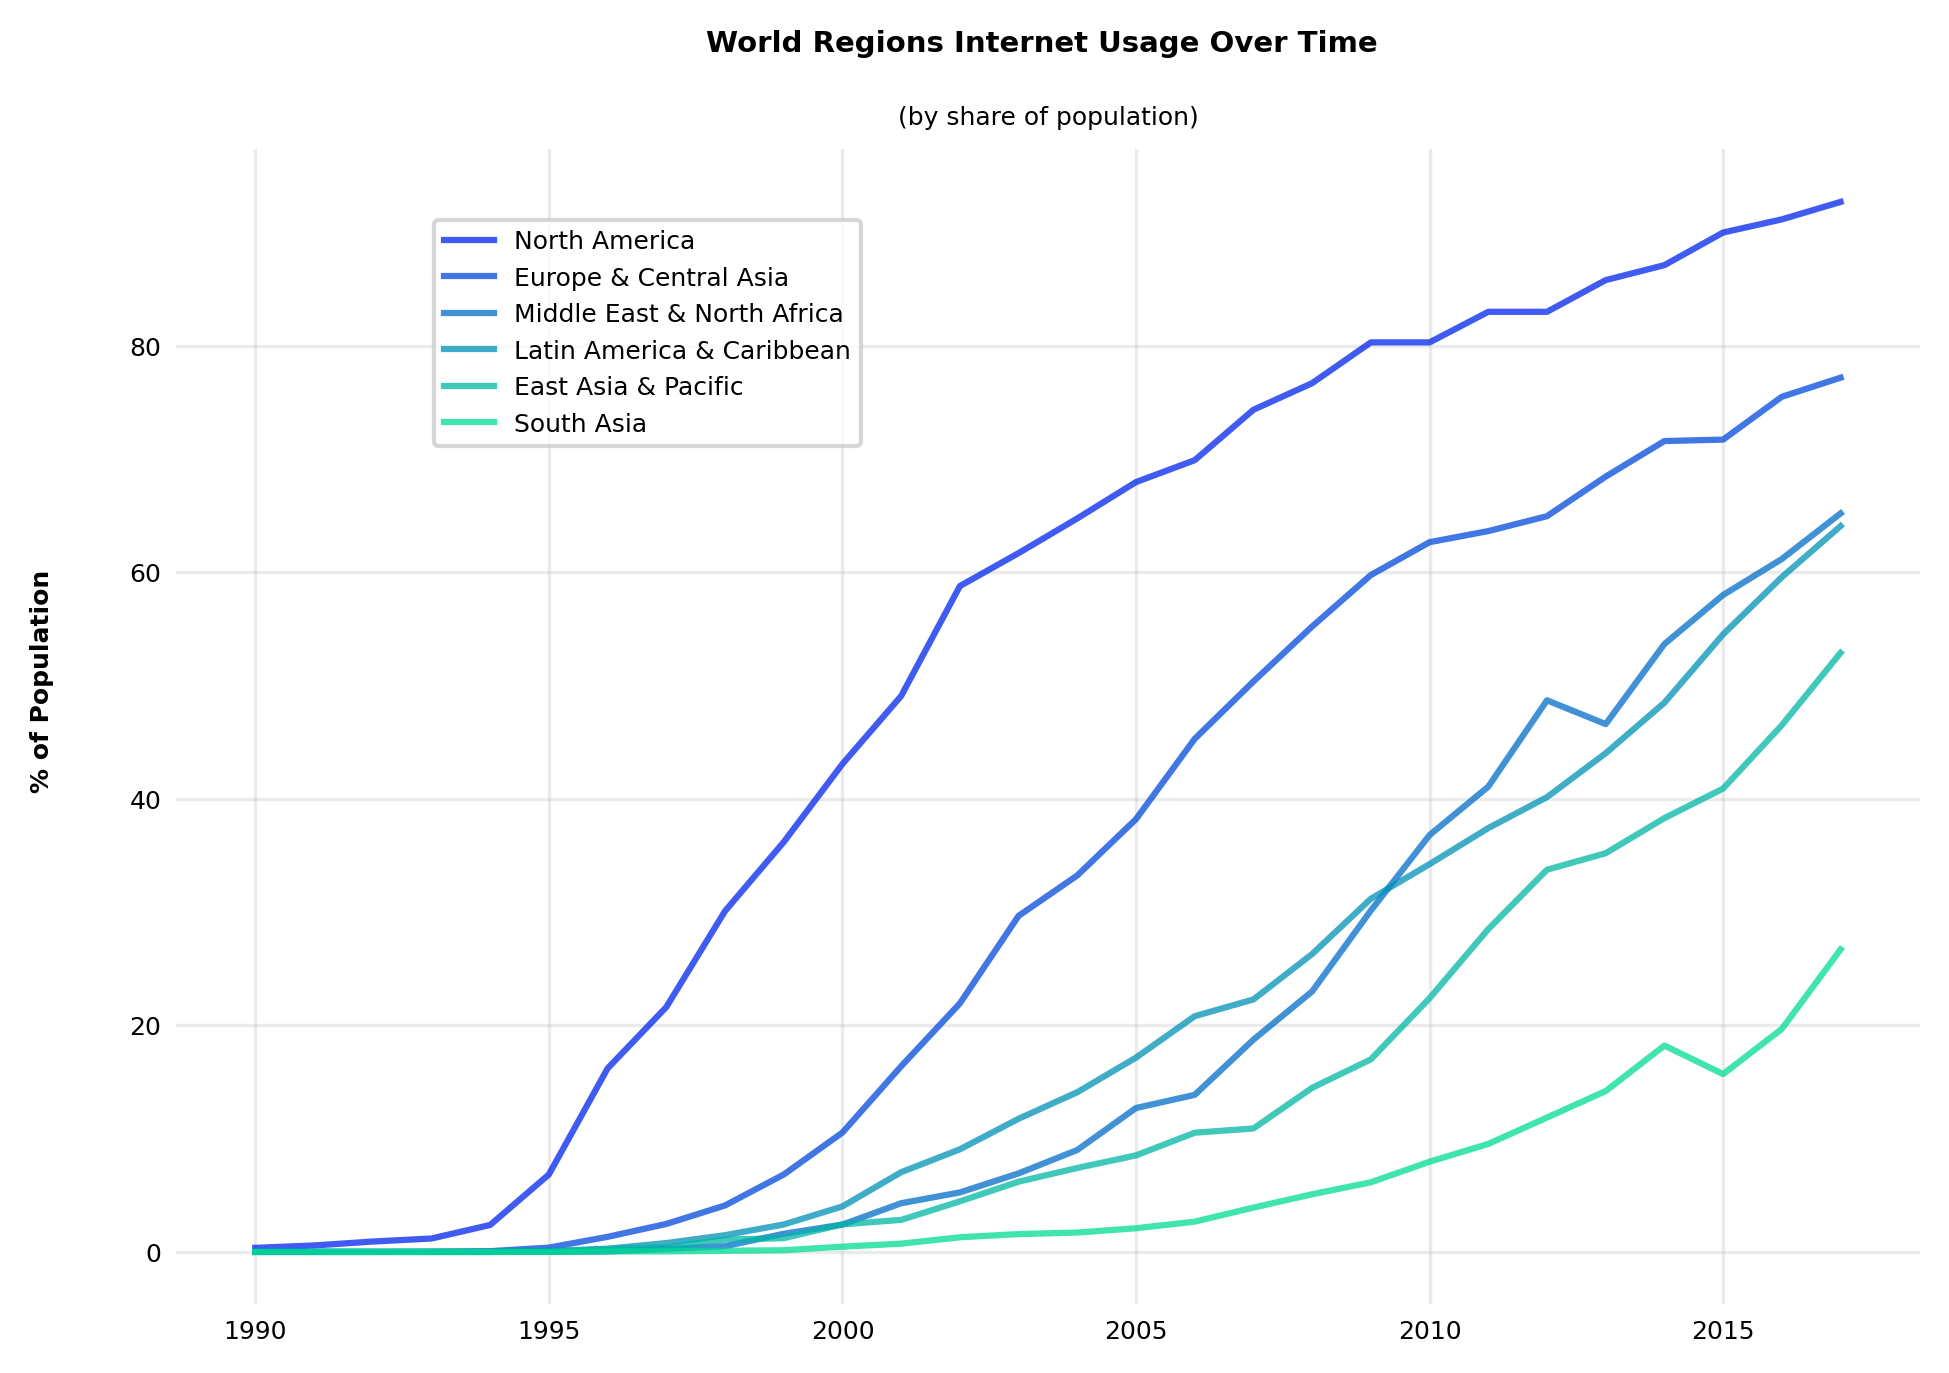

In [47]:
fig, ax = plt.subplots(dpi=300, figsize=(7.5, 5))

order = ['North America', 'Europe & Central Asia', 'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia']

sns.lineplot(data=regions_years, x='Year', y='Internet_Usage', hue='Region', hue_order=order, palette='winter', alpha=0.75, errorbar=None, estimator='median')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', zorder=0, length=0, labelsize=6)
ax.tick_params(axis='y', zorder=0, length=0, labelsize=6)

ax.grid(visible=True, alpha=0.25)

ax.set_xlabel('')
ax.set_ylabel('% of Population', weight='bold', fontsize=6)
ax.yaxis.set_label_coords(-0.07, .54)

leg = ax.legend(fontsize=6, markerscale=3.0, bbox_to_anchor=(0.4, 0.95))

for lh in leg.legendHandles: 
    lh.set_alpha(0.75)

#for legobj in leg.legendHandles:
#    legobj.set_linewidth(2.0)

plt.suptitle('World Regions Internet Usage Over Time', fontsize=7, weight='bold', x=.51, y=0.96)
plt.title('(by share of population)', fontsize=6)

plt.show()

#### 5. World regions Internet usage over time (by number of users)

In [48]:
people.head()

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


In [49]:
classification.head()

,Economy,Code,Region
0,Aruba,ABW,Latin America & Caribbean
1,Afghanistan,AFG,South Asia
2,Angola,AGO,Sub-Saharan Africa
3,Albania,ALB,Europe & Central Asia
4,Andorra,AND,Europe & Central Asia


In [50]:
regions = pd.merge(
    people,
    classification,
    how='left',
    on='Code'
)
#regions.drop(regions[regions.Region == 'Sub-Saharan Africa'].index, inplace=True)

In [51]:
regions

,Entity,Code,Year,Users,Economy,Region
0,Afghanistan,AFG,1990,0,Afghanistan,South Asia
1,Afghanistan,AFG,1991,0,Afghanistan,South Asia
2,Afghanistan,AFG,1992,0,Afghanistan,South Asia
3,Afghanistan,AFG,1993,0,Afghanistan,South Asia
4,Afghanistan,AFG,1994,0,Afghanistan,South Asia
...,...,...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464,Zimbabwe,Sub-Saharan Africa
6375,Zimbabwe,ZWE,2017,3599269,Zimbabwe,Sub-Saharan Africa
6376,Zimbabwe,ZWE,2018,3763048,Zimbabwe,Sub-Saharan Africa
6377,Zimbabwe,ZWE,2019,3854006,Zimbabwe,Sub-Saharan Africa


In [52]:
regions[regions['Region'].isna()]

,Entity,Code,Year,Users,Economy,Region
26,Africa,NaN,1990,0,NaN,NaN
27,Africa,NaN,1991,5434,NaN,NaN
28,Africa,NaN,1992,16232,NaN,NaN
29,Africa,NaN,1993,48970,NaN,NaN
30,Africa,NaN,1994,112387,NaN,NaN
...,...,...,...,...,...,...
6284,World,OWID_WRL,2016,3256356360,NaN,NaN
6285,World,OWID_WRL,2017,3483895373,NaN,NaN
6286,World,OWID_WRL,2018,3795523228,NaN,NaN
6287,World,OWID_WRL,2019,4194082864,NaN,NaN


In [53]:
regions.dropna(inplace=True)

In [54]:
regions[regions['Region'].isna()]

,Entity,Code,Year,Users,Economy,Region


In [55]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6039 entries, 0 to 6378
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Entity   6039 non-null   object
 1   Code     6039 non-null   object
 2   Year     6039 non-null   int64 
 3   Users    6039 non-null   int64 
 4   Economy  6039 non-null   object
 5   Region   6039 non-null   object
dtypes: int64(2), object(4)
memory usage: 330.3+ KB


In [56]:
regions.describe()

,Year,Users
count,6039.000000,6.039000e+03
mean,2004.713198,7.317010e+06
std,8.840544,3.870548e+07
min,1990.000000,0.000000e+00
25%,1997.000000,6.258500e+03
50%,2005.000000,1.764310e+05
75%,2012.000000,2.509381e+06
max,2020.000000,1.003219e+09


In [57]:
regions

,Entity,Code,Year,Users,Economy,Region
0,Afghanistan,AFG,1990,0,Afghanistan,South Asia
1,Afghanistan,AFG,1991,0,Afghanistan,South Asia
2,Afghanistan,AFG,1992,0,Afghanistan,South Asia
3,Afghanistan,AFG,1993,0,Afghanistan,South Asia
4,Afghanistan,AFG,1994,0,Afghanistan,South Asia
...,...,...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464,Zimbabwe,Sub-Saharan Africa
6375,Zimbabwe,ZWE,2017,3599269,Zimbabwe,Sub-Saharan Africa
6376,Zimbabwe,ZWE,2018,3763048,Zimbabwe,Sub-Saharan Africa
6377,Zimbabwe,ZWE,2019,3854006,Zimbabwe,Sub-Saharan Africa


In [58]:
regions_years = regions.groupby(['Year', 'Region'])['Users'].sum()
regions_years = pd.DataFrame(regions_years)
regions_years = regions_years.reset_index()
regions_years = regions_years.pivot(index='Year',
                                    columns='Region',
                                    values='Users')
regions_years = regions_years.reset_index()
regions_years

Region,Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,1990,135113,399647,0,5321,2046626,0,0
1,1991,272426,851729,9944,10608,3085930,0,5434
2,1992,549917,1516045,44032,15776,4659398,1010,16232
3,1993,1105236,2354387,98428,22896,6218221,2021,48371
4,1994,1928852,4424666,205328,38289,13443163,10608,107604
5,1995,3562347,8370202,509104,92011,25762841,254286,301497
6,1996,8320459,15268183,1519931,228151,46175806,471305,405918
7,1997,19609249,27867525,2984453,635063,63400698,785104,831304
8,1998,34430241,45432762,6217533,1382703,90532310,1560416,1545532
9,1999,65112883,78301541,10522859,2712936,111107998,3075976,2423605


In [59]:
regions_1990 = regions[regions['Year'] == 1990]
total_1990 = regions_1990['Users'].sum()

regions_1995 = regions[regions['Year'] == 1995]
total_1995 = regions_1995['Users'].sum()

regions_2000 = regions[regions['Year'] == 2000]
total_2000 = regions_2000['Users'].sum()

regions_2005 = regions[regions['Year'] == 2005]
total_2005 = regions_2005['Users'].sum()

regions_2010 = regions[regions['Year'] == 2010]
total_2010 = regions_2010['Users'].sum()

regions_2015 = regions[regions['Year'] == 2015]
total_2015 = regions_2015['Users'].sum()

regions_2020 = regions[regions['Year'] == 2020]
total_2020 = regions_2020['Users'].sum()

In [60]:
print('Global total in 1990:', humanize.intword(total_1990), 'users.')
print('Global total in 1995:', humanize.intword(total_1995), 'users.')
print('Global total in 2000:', humanize.intword(total_2000), 'users.')
print('Global total in 2005:', humanize.intword(total_2005), 'users.')
print('Global total in 2010:', humanize.intword(total_2010), 'users.')
print('Global total in 2015:', humanize.intword(total_2015), 'users.')
print('Global total in 2020:', humanize.intword(total_2020), 'users.')

Global total in 1990: 2.6 million users.
Global total in 1995: 38.9 million users.
Global total in 2000: 390.6 million users.
Global total in 2005: 1.0 billion users.
Global total in 2010: 2.0 billion users.
Global total in 2015: 2.9 billion users.
Global total in 2020: 4.5 billion users.


In [61]:
regions_2020 = regions[regions['Year'] == 2020]
regions_2020.groupby('Region')['Users'].sum()

Region
East Asia & Pacific           1586219812
Europe & Central Asia          750874087
Latin America & Caribbean      451260121
Middle East & North Africa     296205623
North America                  342111975
South Asia                     725338656
Sub-Saharan Africa             306753372
Name: Users, dtype: int64

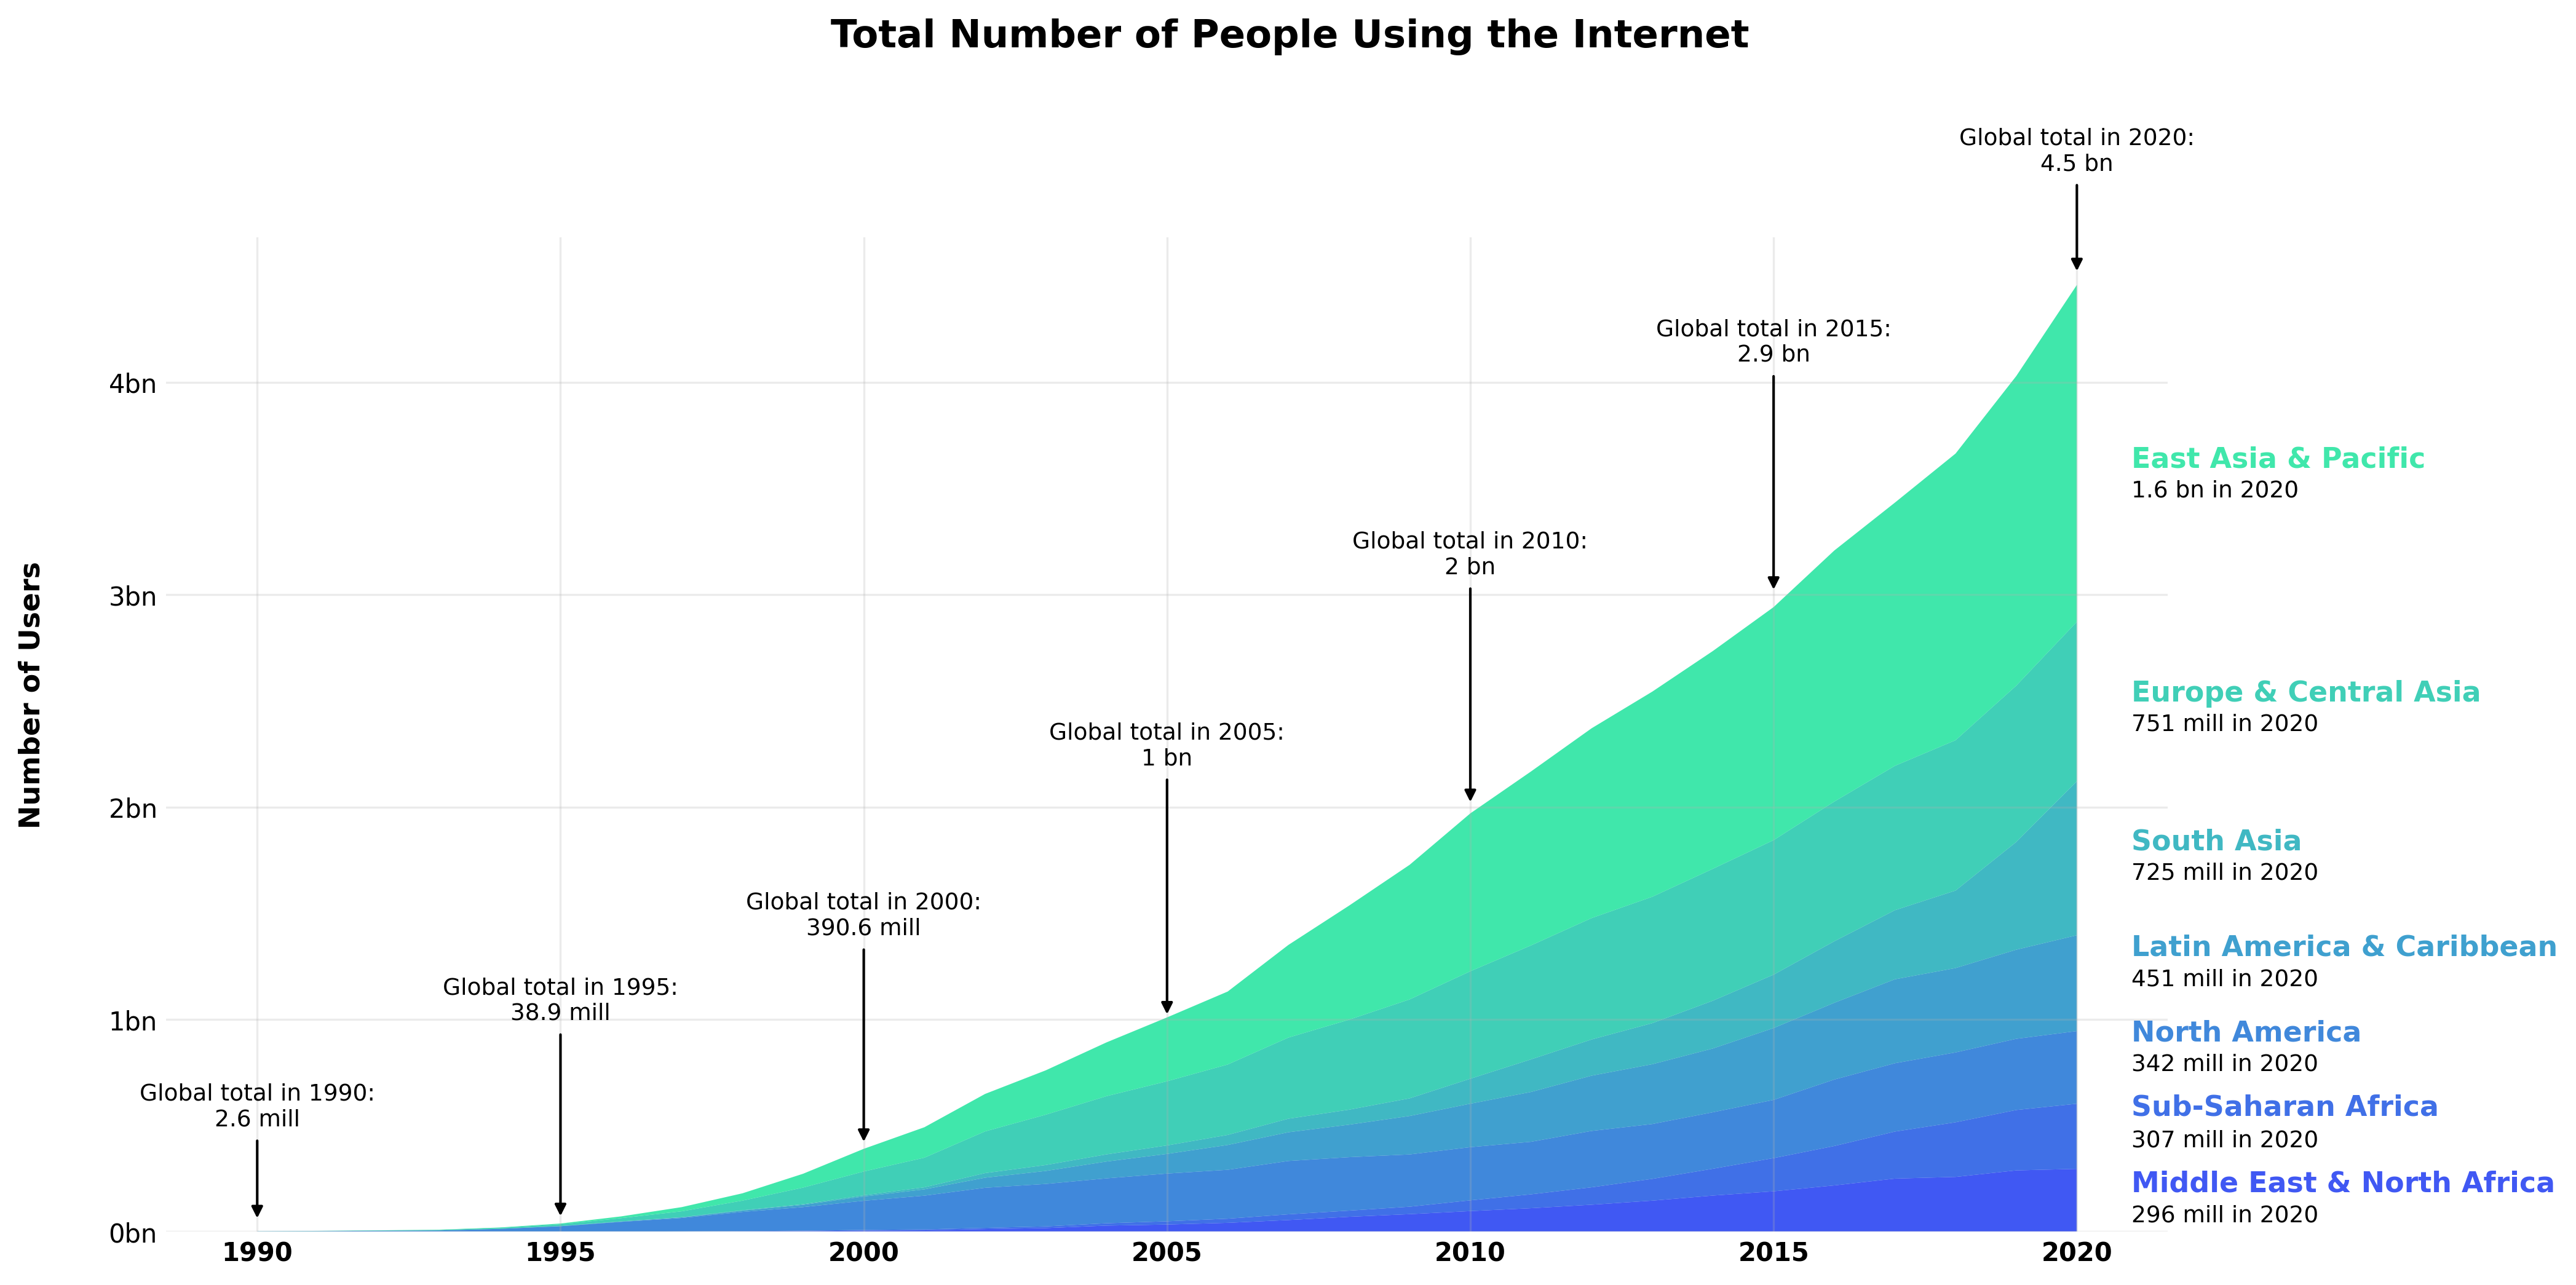

In [62]:
fig, ax = plt.subplots(dpi=300, figsize=(14, 7))

#order = ['North America', 'East Asia & Pacific', 'South Asia', 'Europe & Central Asia', 'Middle East & North Africa', 'Latin America & Caribbean']

plt.stackplot(regions_years['Year'], 
              regions_years['Middle East & North Africa'], 
              regions_years['Sub-Saharan Africa'],
              regions_years['North America'],
              regions_years['Latin America & Caribbean'],
              regions_years['South Asia'],
              regions_years['Europe & Central Asia'],
              regions_years['East Asia & Pacific'],
              baseline='zero',
              colors=sns.color_palette("winter", 7),
              alpha=0.75)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', zorder=0, length=0, labelsize=10)
ax.tick_params(axis='y', zorder=0, length=0, labelsize=10)
ax.set_xticklabels(range(1985, 2021, 5), weight='bold')

ax.set_yticks([0, 1000000000, 2000000000, 3000000000, 4000000000])
ax.set_yticklabels(['0bn', '1bn', '2bn', '3bn', '4bn'])

ax.grid(visible=True, alpha=0.25)

ax.set_xlabel('')
ax.set_ylabel('Number of Users', weight='bold', fontsize=11)

ax.yaxis.set_label_coords(-0.06, .54)

plt.suptitle('Total Number of People Using the Internet', fontsize=15, weight='bold', x=.56, y=1.05)



ax.annotate("East Asia & Pacific", xy=(2021, 4400000000), xytext=(2020.9, 3600000000), size=11, weight='bold', color='#40E7AB')
ax.annotate("1.6 bn in 2020", xy=(2021, 4280000000), xytext=(2020.9, 3460000000), size=9, color='black')

ax.annotate("Europe & Central Asia", xy=(2021, 4400000000), xytext=(2020.9, 2500000000), size=11, weight='bold', color='#40CFB7')
ax.annotate("751 mill in 2020", xy=(2021, 4280000000), xytext=(2020.9, 2360000000), size=9, color='black')

ax.annotate("South Asia", xy=(2021, 4400000000), xytext=(2020.9, 1800000000), size=11, weight='bold', color='#40B8C3')
ax.annotate("725 mill in 2020", xy=(2021, 4280000000), xytext=(2020.9, 1660000000), size=9, color='black')

ax.annotate("Latin America & Caribbean", xy=(2021, 4400000000), xytext=(2020.9, 1300000000), size=11, weight='bold', color='#3FA0CF')
ax.annotate("451 mill in 2020", xy=(2021, 4280000000), xytext=(2020.9, 1160000000), size=9, color='black')

ax.annotate("North America", xy=(2021, 4400000000), xytext=(2020.9, 900000000), size=11, weight='bold', color='#4088DB')
ax.annotate("342 mill in 2020", xy=(2021, 4280000000), xytext=(2020.9, 760000000), size=9, color='black')

ax.annotate("Sub-Saharan Africa", xy=(2021, 4400000000), xytext=(2020.9, 550000000), size=11, weight='bold', color='#4070E7')
ax.annotate("307 mill in 2020", xy=(2021, 4280000000), xytext=(2020.9, 400000000), size=9, color='black')

ax.annotate("Middle East & North Africa", xy=(2021, 4400000000), xytext=(2020.9, 190000000), size=11, weight='bold', color='#4058F3')
ax.annotate("296 mill in 2020", xy=(2021, 4280000000), xytext=(2020.9, 47000000), size=9, color='black')

ax.annotate("Global total in 1990:\n2.6 mill",
            xy=(1990, 40000000),
            xytext=(1990, 500000000),
            size=9,
            horizontalalignment="center",
            arrowprops={'arrowstyle': '-|>', 'color': 'black'})

ax.annotate("Global total in 1995:\n38.9 mill",
            xy=(1995, 50000000),
            xytext=(1995, 1000000000),
            size=9,
            horizontalalignment="center",
            arrowprops={'arrowstyle': '-|>', 'color': 'black'})

ax.annotate("Global total in 2000:\n390.6 mill",
            xy=(2000, 400000000),
            xytext=(2000, 1400000000),
            size=9,
            horizontalalignment="center",
            arrowprops={'arrowstyle': '-|>', 'color': 'black'})

ax.annotate("Global total in 2005:\n1 bn",
            xy=(2005, 1000000000),
            xytext=(2005, 2200000000),
            size=9,
            horizontalalignment="center",
            arrowprops={'arrowstyle': '-|>', 'color': 'black'})
    
    
ax.annotate("Global total in 2010:\n2 bn",
            xy=(2010, 2000000000),
            xytext=(2010, 3100000000),
            size=9,
            horizontalalignment="center",
            arrowprops={'arrowstyle': '-|>', 'color': 'black'})

ax.annotate("Global total in 2015:\n2.9 bn",
            xy=(2015, 3000000000),
            xytext=(2015, 4100000000),
            size=9,
            horizontalalignment="center",
            arrowprops={'arrowstyle': '-|>', 'color': 'black'})

ax.annotate("Global total in 2020:\n4.5 bn",
            xy=(2020, 4500000000),
            xytext=(2020, 5000000000),
            size=9,
            horizontalalignment="center",
            arrowprops={'arrowstyle': '-|>', 'color': 'black'})


plt.show()

##### Further insight:

In [63]:
print("Global total in 2010:", total_2010)
print("Global total in 2020:", total_2020)

Global total in 2010: 1970188865
Global total in 2020: 4458763646


In [64]:
print("The number of people that are online increased from", total_2010, "in 2010 to", total_2020, "in 2020.")
print("That is an increase of " + str(total_2020 - total_2010) + " or " + str(round(((total_2020 - total_2010)/total_2010)*100)) + "%" + " over 10 years.")
print("On average this means that", round((((total_2020 - total_2010)/10)/365)), "people were online for the first time on an average day in these last 10 years.")
print("That is", round(((((total_2020 - total_2010)/10)/365)/24)), "new people online every hour.")


The number of people that are online increased from 1970188865 in 2010 to 4458763646 in 2020.
That is an increase of 2488574781 or 126% over 10 years.
On average this means that 681801 people were online for the first time on an average day in these last 10 years.
That is 28408 new people online every hour.
